# COMP1801 Tutorial Week 1 - Python Introduction
*Dr Peter Soar - 2022/23*

This opening tutorial is going to be a bit of a whistlestop tour of various things I think it would be helpful to ensure that you to know for the rest of the module. If you are a January starter or have just have lots of experience in these topics, then I'm afraid this tutorial may be a bit dull.
Apologies, but we need to make sure everyone is up to speed on the basics before we can move onto the more interesting topics next week!

On the other hand, if you find yourself struggling with anything in this tutorial it will be worth while putting in the work now to do some more practice, otherwise you will likely find yourself having more problems as term goes on.



## 1. Colab basics

In this section I just want to quickly introduce you to the colab environment we will be using for this module.

A google Colab instance is essentially a Jupiter notebook hosted remotely, to this means the file you are currently reading is a notebook full of markdown text cells and cells filled with code that you can edit and execute. Here are a few things that you should remember:

*   In order to edit this notebook if you came here directly from the link, you must first make a copy to your own google drive (and log into google if you have not already).
*   Cells can be edited by clicking inside them.
*   To execute a cell, press SHIFT + ENTER or hit the 'play' button on the left of the cell
*   You can add new cells with the `+Code` and `+Text` button near the top of the screen.
*  There are some useful commands under `Runtime` that allow you to do things such as restart the workbook and run all the cells in order.
*   It's generally a good idea to run all cells in a workbook in order, as there will likely be dependencies that will cause errors if run out of order. If something isn't working and you are not sure why, a good first step is generally to restart the runtime and run all cells in the workbook in order again.
* On the left are various buttons you can click to expand, showing things such as: Table of contents, a find and replace utility, view all of the variables in use and view the Colab file system.
*  It's good practice to start the workbook with a cell containing the packages you will be using rather than importing them ad hoc as you need them in the workbook, like we have below:


In [1]:
# Run this cell or a lot of the code in the workbook will not work!
import numpy as np # A useful package for dealing with mathematical processes
import sklearn.datasets # sklearn is an important package for much of the ML we will be doing, but this time we are only interested in its datasets
import pandas as pd # a common package for viewing tabular data

Hopefully that will make things clear if you have never used Colab (or a notebook) before.

If you are struggling with using python more generally, there are many free online tutorials which will introduce you to all the basic python commands and operations that you should know.

## 2. Linear Algebra Recap

In the lectures, when describing how models work it will often be helpful to describe the models using mathematical notation, which means you will need to understand the basics of how vectors and matrices work in both theory and in Python so we can understand how they are related to our ML algorithms.

Hopefully this section will just be a refresh of some mathematical concepts that you have encountered in the past, but if all of this is new to you I would recommend doing some more practice in your own time with free online tutorials (for Linear Algebra / Matrices) or by checking out some books on the reading list such as 'Mathematics for Machine Learning', which you can also obtain free online copies of.

## 2.1 Matrices and Vectors



A matrix is a rectangular array of numbers written inside of square brackets, often represented as a bold upper case letter in cases where you do not want to write out the entire Matrix, for example:
$$
\boldsymbol{A}
= \begin{bmatrix}
2 & 11  & -12 \\
6 & 13  & -1 \\
7 & 19  & -6 \\
\end{bmatrix}
$$

or for the general case we can take the following matrix $\boldsymbol{B} $  where *m* is the number of rows and *n* is the number of columns for the matrix populated with real numbers $a_{ij}$:
$$
\boldsymbol{B}
= \begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n-1} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n-1} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m-1,0} & a_{m-1,1} & \cdots & a_{m-1,n-1} \\
\end{bmatrix}
$$

Each row or column of the Matrix can also be represented using a vector. A vector is a 1D array of numbers written inside square brackets and usually represented with a lowercase letter when not writing out the full vector:


$$\boldsymbol{a}
=
\begin{bmatrix}
2\\
6 \\
7  \\
\end{bmatrix}
.
$$
or for the general case we can take the following vector $\boldsymbol{b} $  where *m* is the number of rows for the vector populated with real numbers $v_{i}$:
$$\boldsymbol{b}
=
\begin{bmatrix}
v_{0} \\
v_{1} \\
\vdots \\
v_{m-1} \\
\end{bmatrix}
.
$$


## 2.2 Working with matrices

The following are some important things you should know about working with matrices (and vectors, which are just a specific type of 1D matrix):


*   You can add (or subtract) matrices, but the matrices must have the same dimensions, where the corresponding elements of the matrix are added to create a new Matrix:
$$
\boldsymbol{A} + \boldsymbol{B}
= \begin{bmatrix}
2 & 11 \\
6 & 13 \\
\end{bmatrix} + \begin{bmatrix}
8 & 17 \\
7 & 11 \\
\end{bmatrix}
= \begin{bmatrix}
2+8 & 11+17 \\
6+7 & 13+11 \\
\end{bmatrix}
=\begin{bmatrix}
10 & 28 \\
13 & 24 \\
\end{bmatrix}
$$

*   You can multiply (or divide) a matrix by any scalar, which acts upon every element of the matrix:
$$
3 \times \boldsymbol{A}
= 3 \times \begin{bmatrix}
2 & 11 \\
6 & 13 \\
\end{bmatrix}=\begin{bmatrix}
3 \times 2 & 3 \times 11 \\
3 \times 6 & 3 \times 13 \\
\end{bmatrix}
=
\begin{bmatrix}
6 & 33 \\
18 & 39 \\
\end{bmatrix}
$$
*   Matrix multiplication is a more complex process, where to obtain the elements of the new matrix, for each column of the left matrix, you step through each column of the right matrix, multiplying the corresponding elements and adding together these products to get the new value for each element of the matrix. This is probably easiest to understand by seeing it in practice, visualised here by this simple, general case:
$$
\boldsymbol{B} \times
\boldsymbol{C}  
= \begin{bmatrix}
b_{0,0} & b_{0,1} \\
b_{1,0} & b_{1,1} \\
\end{bmatrix} \times \begin{bmatrix}
c_{0,0} & c_{0,1} \\
c_{1,0} & c_{1,1} \\
\end{bmatrix}
=
\begin{bmatrix}
b_{0,0} \times c_{0,0} +  b_{0,1} \times c_{1,0}  & b_{0,0} \times c_{0,1} +  b_{0,1} \times c_{1,1} \\
b_{1,0} \times c_{0,0} +  b_{1,1} \times c_{1,0}  & b_{1,0} \times c_{0,1} +  b_{1,1} \times c_{1,1} \\
\end{bmatrix}
$$
and using real values:
$$
\boldsymbol{B} \times
\boldsymbol{C}  
= \begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix} \times \begin{bmatrix}
5 & 6 \\
7 & 8 \\
\end{bmatrix}
=
\begin{bmatrix}
1 \times 5 +  2 \times 7  & 1 \times 6 +  2 \times 8 \\
3 \times 5 +  4 \times 7 & 3 \times 6 + 4 \times 8 \\
\end{bmatrix}
=
\begin{bmatrix}
5 +  14  & 6 +  16 \\
15 +  28 & 18 + 32 \\
\end{bmatrix} =
\begin{bmatrix}
19  & 22 \\
43 & 50 \\
\end{bmatrix}
$$
*   Matrix multiplication has some properties we need to keep in mind:
 - Matrix multiplication is not commutative, this means that the order of your matrices matters and so $\boldsymbol{B} \times
\boldsymbol{C}  \neq \boldsymbol{C} \times
\boldsymbol{B}$
  - Matrix multiplication is associative, meaning that $(\boldsymbol{A} \times\boldsymbol{B}) \times
\boldsymbol{C}  =  \boldsymbol{A} \times (\boldsymbol{B} \times
\boldsymbol{C})$
  - We have an identity matrix where the diagonal is all '1', and any matrix multiplied by the identity matrix remains unchanged:
 $$\boldsymbol{I} \times \boldsymbol{B} = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix} \times
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix} =
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix}
$$
  - You can multiply differently sized matrices, but their dimensions must correspond (and this can lead a matrix with different dimensions to either of the initial matrices). You can multiply a vector and a matrix because of this.
  $$
\boldsymbol{B} \times
\boldsymbol{v}  
= \begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix}
\times \begin{bmatrix}
5 \\
7 \\
\end{bmatrix}
=
\begin{bmatrix}
1 \times 5 +  2 \times 7   \\
3 \times 5 +  4 \times 7  \\
\end{bmatrix}
=
\begin{bmatrix}
5 +  14   \\
15 +  28  \\
\end{bmatrix} =
\begin{bmatrix}
19  \\
43  \\
\end{bmatrix}
$$

* You can work out the inverse of a matrix such that $\boldsymbol{B} \times \boldsymbol{B}^{-1} = \boldsymbol{I}$. I won't go into the details of working out a matrix inverse here as it is quite involved and we won't need to manually calculate the matrix inverse in this module.
* The transpose of a matrix is an operation that swaps the rows and columns of a matrix, such that for matrix:
$$\boldsymbol{A}
= \begin{bmatrix}
24 & 17 \\
5 & 64 \\
34 & 55 \\
\end{bmatrix}$$
The transpose (denoted $\boldsymbol{A}^{T}$) would be:
$$
\boldsymbol{A}^{T}
= \begin{bmatrix}
24 & 5 & 34 \\
17 & 64 & 55 \\
\end{bmatrix}
$$



## 2.3 Matrices in Python
  - A matrix (e.g. $\boldsymbol{A}$) is represented by 2D `np.array` (e.g. `A`) in NumPy.
  - `A.shape`: the shape of `A`. If `A` represents an $m \times n$ matrix, then `A.shape == (m, n)`.
  - $a_{i,j}$ (`A[i, j]`): the element in the $i$-th row and $j$-th column of $\boldsymbol{A}$ (`A`).
  - `A[i, :]`: the 1D `np.array` that contains the $i$-th row of $\boldsymbol{A}$\
`A[i, :]` $=$ `[A[i, 0], A[i, 1], ..., A[i, n-1]]`
$=
    \begin{bmatrix}
    a_{i,0} & a_{i,1} & \cdots & a_{i,n-1} \\
    \end{bmatrix}
    .
$
  - `A[:, j]`: the 1D `np.array` that contains the $j$-th column of $\boldsymbol{A}$.\
`A[:, j]` $=$ `[A[0, j], A[1, j], ..., A[m-1, j]]`
$=
    \begin{bmatrix}
    a_{0,j} \\ a_{1,j} \\ \vdots \\ a_{m-1,j} \\
    \end{bmatrix}
    .
$
  - A 2D `np.array` is the stack of the 1D arrays that correspond to the **row** vectors.\
`A` $=$ `[A[0, :], A[1, :], ..., A[m-1, :]]`\
 $=$\
`[[A[0, 0], A[0, 1], ..., A[0, n-1]],`\
&ensp;`[A[1, 0], A[1, 1], ..., A[1, n-1]],`\
&ensp;`...,`\
&ensp;` [A[m-1, 0], A[m-1, 1], ..., A[m-1, n-1]]]`
  - $\boldsymbol{A}^{\top}$ (`A.T`): the transpose of $\boldsymbol{A}$. If `A.shape == (m, n)` then `A.T.shape == (n, m)`.
  - You can perform matrix multiplication by using the `.dot()` function, so $\boldsymbol{A} \times \boldsymbol{B}$ would be `A.dot(B)`
  - Vectors:
    - We always represent a row vector as the transpose of the column vector, e.g. $\boldsymbol{v}^{\top}$.
    - A row or column vector (e.g. $\boldsymbol{v}$ or $\boldsymbol{v}^{\top}$) is usually represented by an 1D `np.array` (e.g. `v`) in NumPy.
    - Note: an 1D `np.array` does not distinguish row and column vectors.
    - To distinguish them (e.g. matrix multiplication), we use an $m \times 1$ 2D `np.array` (an $m$-dimensional column vector) or $1 \times n$ 2D `np.array`  (an $n$-dimensional row vector).
    - `v.shape`: the shape of `v`. If `v` represents a vector with the size of $m$, then `v.shape == (m, )`.
    - `v[i]`: the `i`-th element of `v`.
$$
    \texttt{v}
    \texttt{==}
    \texttt{[v[0], v[1], ..., v[m-1]]} \\
    =
    \begin{bmatrix}
    v_{0} \\
    v_{1} \\
    \vdots \\
    v_{m-1} \\
    \end{bmatrix}.
$$


### Example of accessing elements of vectors and matrices and performing  matrix operations

In [2]:
# Create a vector
v = np.array( [ 1, 2**2, 3**2, 4**2, 5**2, 6**2, 7**2, 8**2] )
print('v =', v) # See the whole vector
# Access the elements
print('v[0] =', v[0])
print('v[1] =', v[1])
print('v[4] =', v[4])
print('v[7] =', v[7])

#Create a Matrix
A = np.array( [[ 1, 2**2, 3**2],[4**2, 5**2, 6**2],[7**2, 8**2,9**2]] )
print('A =\n', A, '\n') # View the whole matrix
print('A[2, :] =', A[2, :]) # View a row
print('A[:, 0] =', A[:, 0]) # View a column
print('A[1, 2] =', A[1, 2]) # View a single element

# Make a new matrix
B = np.array( [[ 1, 2, 3],[4, 5, 6],[7, 8,9]] )
print('B =\n', B, '\n') # View the whole matrix
print('Matrix Addition')
print('A+B =\n', A+B, '\n')
print('Matrix Subtraction')
print('A-B =\n', A-B, '\n')

print('Scalar multiplication')
print('3*A =\n', 3*A, '\n')
print('Transpose')
print('A^T =\n', A.T, '\n')
print('Matrix Multiplication')
print('AB =\n', A.dot(B), '\n')


v = [ 1  4  9 16 25 36 49 64]
v[0] = 1
v[1] = 4
v[4] = 25
v[7] = 64
A =
 [[ 1  4  9]
 [16 25 36]
 [49 64 81]] 

A[2, :] = [49 64 81]
A[:, 0] = [ 1 16 49]
A[1, 2] = 36
B =
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

Matrix Addition
A+B =
 [[ 2  6 12]
 [20 30 42]
 [56 72 90]] 

Matrix Subtraction
A-B =
 [[ 0  2  6]
 [12 20 30]
 [42 56 72]] 

Scalar multiplication
3*A =
 [[  3  12  27]
 [ 48  75 108]
 [147 192 243]] 

Transpose
A^T =
 [[ 1 16 49]
 [ 4 25 64]
 [ 9 36 81]] 

Matrix Multiplication
AB =
 [[  80   94  108]
 [ 368  445  522]
 [ 872 1066 1260]] 



### Exercise
Take the matrices
$$
\boldsymbol{A}
= \begin{bmatrix}
6 & 3 & 5\\
12 & -5 & 11\\
-4 & 7 & -2\\
\end{bmatrix}, \boldsymbol{B}
= \begin{bmatrix}
4 & 6 & 6 \\
9 & 12 & 9 \\
3 & 21 & 1 \\
\end{bmatrix}, \boldsymbol{v}
=\begin{bmatrix}
2  \\
9  \\
14   \\
\end{bmatrix}
$$
Using Python create these matrices and try to work out the following:
* $\boldsymbol{A} + \boldsymbol{B}$
* $\boldsymbol{B} - \boldsymbol{A}$
* $3 \times \boldsymbol{A} - 2 \times \boldsymbol{B}$
* $\boldsymbol{A} \times \boldsymbol{B}$
* $\boldsymbol{B} \times \boldsymbol{A}$
* $\boldsymbol{A} \times \boldsymbol{v}$


In [3]:
##############################
# Your code Here
##############################

# Create a vector




In [4]:
import numpy as np

# Define the matrices
A = np.array([[6, 1, 2], [-4, 3, -5], [7, 5, 11]])
B = np.array([[4, 9, 3], [6, 1, 2], [1, 6, 9]])
v = np.array([2, 9, 14])

# Perform operations
A_plus_B = A + B
B_minus_A = B - A
three_times_A_minus_two_times_B = 3*A - 2*B
A_times_B = np.dot(A, B)
B_times_A = np.dot(B, A)
A_times_v = np.dot(A, v)

# Print results
print("A + B:")
print(A_plus_B)

print("\nB - A:")
print(B_minus_A)

print("\n3A - 2B:")
print(three_times_A_minus_two_times_B)

print("\nA * B:")
print(A_times_B)

print("\nB * A:")
print(B_times_A)

print("\nA * v:")
print(A_times_v)


A + B:
[[10 10  5]
 [ 2  4 -3]
 [ 8 11 20]]

B - A:
[[-2  8  1]
 [10 -2  7]
 [-6  1 -2]]

3A - 2B:
[[ 10 -15   0]
 [-24   7 -19]
 [ 19   3  15]]

A * B:
[[ 32  67  38]
 [ -3 -63 -51]
 [ 69 134 130]]

B * A:
[[ 9 46 -4]
 [46 19 29]
 [45 64 71]]

A * v:
[ 49 -51 213]


## 3. Data Loading & Manipulation

We can't implement Machine Learning techniques if we don't have any data to use it on!
For the later tutorials, your coursework and likely for many other projects (either on the MSc or in the future) it will be critical that you know how to load data into python (into google Colab specifically in our case), view that data and perform various operations to manipulate that data into the form we need.

This section will show you some different methods you can use to get your data into colab, and then demonstrate some of the key ways of viewing and manipulating it.

### 3.1 Data Loading

**Method 1: Load from packages**

The first case is a bit of a cheat - some python packages may come with some datasets included. Of particular interest to us is sklearn, which we will be using a lot in this module. This includes a selection of datasets that are commonly used for initial testing of ML techniques. I'm going to show one example here, but you can see what other datasets are included at:
https://scikit-learn.org/stable/datasets.html

Note, there are some very small toy datasets that you *load*, and some larger ones (real world datasets) that you *fetch*.

In [5]:
# Load the California housing dataset using the following command
house = sklearn.datasets.fetch_california_housing()
# If you display this you can see there are multiple parts to the dataset: Data, target data, target names, feature (column) names and a description of the dataset.
display(house)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

 We will go into 'target' and 'feature' aspects of the data in more detail next week, for now let's combine all this data into a nice dataframe.

In [6]:
# We can see that the 'Data' is just that, the predictive attributes with no names or the house values.
df = pd.DataFrame(data= house['data'])
display(df)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
# Here we stitch together the predictive and target data together using 'c_' and we combine the feature and target names that go into 'columns'
df = pd.DataFrame(data= np.c_[house['data'], house['target']], columns= house['feature_names'] + ['target'])

# show the data
display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Exercise**
Try loading a copy of the famous 'Iris' dataset into a dataframe, which sklearn also has preloaded as a dataset (see link given above). Note that this is a small 'Toy' dataset, so you want to *load* rather than *fetch* it from sklearn.

In [8]:
##############################
# Your code Here
##############################

# Load the Irish dataset using the following command
from sklearn.datasets import load_iris
iris_data = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

# Show the first few rows of the DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


**Method 2: Upload a .csv from your computer**
I have created a small dataset based on the California housing data which I have uploaded to moodle. Download it to your computer and try uploading it to Colab by doing the following:


1.   Open the Colab filesystem (the little folder on the left of your scree)
2.   Click the upload to session storage button (the page with an arrow)
3.   Select the .csv file from your computer

You should now be able to see the .csv file in the file system.

Note that files loaded into the filesystem will be removed when you close down colab. You may want to research mounting your google drive into Colab and storing your data on there if this is causing you problems.






In [11]:
# you can use the read_csv command to store the .csv in a variable
housingData = pd.read_csv('caliHousing_exercise.csv')
# This file has all the data elements constructed already, so we can just put the entire thing into the 'data='
df = pd.DataFrame(data= housingData)

# show the data
display(df)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
245,-122.21,37.78,43.0,1702.0,460.0,1227.0,407.0,1.7188,126800.0
246,-122.21,37.78,47.0,881.0,248.0,753.0,241.0,2.6250,111300.0
247,-122.22,37.77,40.0,494.0,114.0,547.0,135.0,2.8015,114800.0
248,-122.22,37.78,50.0,1776.0,473.0,1807.0,440.0,1.7276,102300.0


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Method 3: Load from .csv on your computer directly**

You can also import local files without having to go into the file system and clicking buttons. Delete the version currently uploaded in the file system and try the following:

In [13]:
#  You need to import these packages so that colab can load from your computer.
from google.colab import files

#uploaded = files.upload()    # Will prompt you to select file
# Your file is now in the Colab filesystem on the left (click the little folder and you should see the file caliHousing_exercise.csv)
housingData_csv = pd.read_csv('/content/drive/MyDrive/Greenwich /Term 1/Machine Learning /Lab 1 /caliHousing_exercise.csv')

In [14]:
# This file has all the data elements constructed already, so we can just put the entire thing into the 'data='
df = pd.DataFrame(data= housingData_csv)

# show the data
display(df)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
245,-122.21,37.78,43.0,1702.0,460.0,1227.0,407.0,1.7188,126800.0
246,-122.21,37.78,47.0,881.0,248.0,753.0,241.0,2.6250,111300.0
247,-122.22,37.77,40.0,494.0,114.0,547.0,135.0,2.8015,114800.0
248,-122.22,37.78,50.0,1776.0,473.0,1807.0,440.0,1.7276,102300.0


**Method 4: Data stright from URL**

If you have a URL direct to any .csv files then that can be read directly into the *read_csv* command. Here I found another version of the housing data in a GitHub repository.

In [15]:
housingData_url = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
# This file has all the data elements constructed already, so we can just put the entire thing into the 'data='
df = pd.DataFrame(data= housingData_url)

# show the data
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**Exercise**

Try looking on the internet to find a copy of the 'Iris' dataset and load it as a .csv file (either from a link or by downloading a local copy to your computer).

In [16]:
##############################
# Your code Here
##############################
irish =pd.read_csv('/content/drive/MyDrive/Greenwich /Term 1/Machine Learning /Lab 1 /Iris.csv')
irish

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


There are some other methods of getting data into colab and of course other types of potential data sources than .csv files. However, for the purposes of this module what we have covered here should be sufficient.

### 3.2 Data Manipulation

While there can be much more to getting your data in the right format for your ML implementation. In this context, all I mean by 'data manipulation' are the simple operations such as splitting your dataset in separate frames for different columns or removing any unwanted rows/columns.

Consider the housing dataset:

In [17]:
house = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(data= np.c_[house['data'], house['target']], columns= house['feature_names'] + ['target'])
display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Suppose we decide that the 'Latitude' and 'Longitude' values give us no predictive weight, we may decide we want to remove them from our dataset by dropping the columns.

In [18]:
df_cut=df.copy() # Make a copy of the dataframe when dropping/updating so you have the old data still
df_cut.drop(["Latitude", "Longitude"], axis = 1, inplace=True)
display(df_cut)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


Similarly, we can also drop rows of the data is we need to (compare output with above - rows 2 and 3 are gone):

In [19]:
df_cut.drop([2, 3], axis = 0, inplace=True)
display(df_cut)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,2.992
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


But if you only want a few columns, it is probably easier to just copy the columns you want into their own new data frames. If we only want to use the 'MedInc' and 'HouseAge' as our features and we wanted to separate out the target we could do the following:

In [20]:
features = df[['MedInc','HouseAge']]
target = df[['target']]

# This time lets print out just the top rows using 'head' so we don't have too much output
print(features.head(5))
print(target.head(5))


   MedInc  HouseAge
0  8.3252      41.0
1  8.3014      21.0
2  7.2574      52.0
3  5.6431      52.0
4  3.8462      52.0
   target
0   4.526
1   3.585
2   3.521
3   3.413
4   3.422


You can also target single cells in the frame to be updated.

In [21]:
features_updated=features.copy() # make a copy when dropping/updating so you have the old data still
features_updated['HouseAge'][1]=31
print(features_updated.head(5))

   MedInc  HouseAge
0  8.3252      41.0
1  8.3014      31.0
2  7.2574      52.0
3  5.6431      52.0
4  3.8462      52.0


**Exercise**

Load the Iris dataset again. This time, calculate a new variable called 'Petal Area (cm^2)' which is the product of the petal length and width. Create a new data frame removing the length and width but replacing them with the area.

Then update the target column so that all the target values of '2' are set to be '1' (the the target values can now only be '0' or '1' - so now this is a binary classification problem).

In [27]:
##############################
# Your code Here
##############################


In [28]:
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target

# Create a DataFrame
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = target

# Calculate petal area and replace length and width with the area
df['Petal Area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']
df.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace=True)

# Update target column
df['target'] = df['target'].apply(lambda x: 1 if x == 2 else x)

# Display the updated DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  target  Petal Area (cm^2)
0                5.1               3.5       0               0.28
1                4.9               3.0       0               0.28
2                4.7               3.2       0               0.26
3                4.6               3.1       0               0.30
4                5.0               3.6       0               0.28


## 4. Data Preprocessing and EDA

For this module we are generally going to be assuming that our data is clean (no errors/duplicates), well balanced and essentially ready to use with our models as soon as it is loaded (with the exception of normalisation/standardization and data splitting that we will cover in a later week), just to speed things up and let us focus on the actual ML models.

However, when dealing with real data (either for your MSc project or if you end up working with real data in Industry) you certainly can't assume this will be the case. As bad data will lead to bad models, you should get into the habit of always performing an Exploratory Data Analysis (EDA) to understand your data and using preprocessing to deal with any obvious data issues.

These are topics that should be covered in a lot more detail on other modules (especially if you are a Data Science student), so there aren't any exercises in this section. This is just meant to be a short summary to make sure you know to always keep the quality of your data in mind if you are ever fitting ML models to your own data outside of the Module.

Reload the .csv version of the Housing data that I have provided on moodle - this edited version has a few errors in it I want us to find.

In [29]:
#uploaded = files.upload()    # Will prompt you to select file, uncomment this if the data is no longer loaded into the filesystem for you.
housingData_csv = pd.read_csv('caliHousing_exercise.csv')

# You can find out various attributes of the dataset before even looking at it with the following commands

print('Shape of the data (rows and columns):')
print(housingData_csv.shape)
print()
print('List of the column names:')
print(housingData_csv.columns)
print()
print('The data type of all the columns (all just floats here):')
print(housingData_csv.dtypes)

Shape of the data (rows and columns):
(250, 9)

List of the column names:
Index(['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome',
       'medianHouseValue'],
      dtype='object')

The data type of all the columns (all just floats here):
longitude           float64
latitude            float64
housingMedianAge    float64
totalRooms          float64
totalBedrooms       float64
population          float64
households          float64
medianIncome        float64
medianHouseValue    float64
dtype: object


You then might want to look at the actual data:

In [30]:
# We've been using display a lot, which looks nice and does let us explore the data easily by converting it into an interactive table.
display(housingData_csv)

# However, a lot of the time you just want a quick sanity check that your data looks how you expect, which the head command is good for.
print(housingData_csv.head())

# Or you may want to take a random sample of your data
print(housingData_csv.sample(10))

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
245,-122.21,37.78,43.0,1702.0,460.0,1227.0,407.0,1.7188,126800.0
246,-122.21,37.78,47.0,881.0,248.0,753.0,241.0,2.6250,111300.0
247,-122.22,37.77,40.0,494.0,114.0,547.0,135.0,2.8015,114800.0
248,-122.22,37.78,50.0,1776.0,473.0,1807.0,440.0,1.7276,102300.0


   longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88              41.0       880.0          129.0   
1    -122.22     37.86              21.0      7099.0         1106.0   
2    -122.24     37.85              52.0      1467.0          190.0   
3    -122.25     37.85              52.0      1274.0          235.0   
4    -122.25     37.85              52.0      1627.0          280.0   

   population  households  medianIncome  medianHouseValue  
0       322.0       126.0        8.3252          452600.0  
1      2401.0      1138.0        8.3014          358500.0  
2       496.0       177.0        7.2574          352100.0  
3       558.0       219.0        5.6431          341300.0  
4       565.0       259.0        3.8462          342200.0  
     longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
10     -122.26     37.85              52.0      2202.0          434.0   
192    -122.25     37.79              51.0       175.0           43

We then want to check some basic statistics about our data, see if there are any obvious outliers.

In [31]:
housingData_csv.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,249.000000,249.000000,250.000000,249.000000,249.000000,250.000000,249.000000,250.000000,249.000000
mean,-121.792811,37.812691,43.973200,1878.236948,433.361446,1386.864000,407.562249,3.123092,186703.630522
std,7.113208,0.021393,10.583861,1173.798420,314.483931,6288.751117,297.309164,1.971669,94593.422270
min,-122.300000,37.770000,0.300000,12.000000,4.000000,18.000000,7.000000,0.499900,3.000000
25%,-122.270000,37.800000,39.000000,1007.000000,237.000000,601.000000,227.000000,1.847325,114800.000000
50%,-122.250000,37.810000,49.000000,1656.000000,376.000000,902.500000,352.000000,2.609900,151000.000000
75%,-122.220000,37.830000,52.000000,2375.000000,514.000000,1225.500000,485.000000,3.597650,243800.000000
max,-10.000000,37.880000,52.000000,7099.000000,2477.000000,100000.000000,2323.000000,11.601700,500001.000000


Looking at this there seems to be some clear issues. A median House value of 3, max population of 100K and the significantly different latitude all jump out as being issues.

<Axes: >

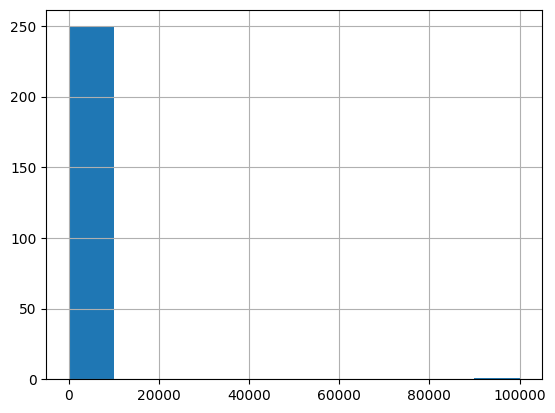

In [32]:
# You might also want to use data visualisations like this histogram to help you spot potential errors in the data. I think we can be confident that the 100K population value is an error.
housingData_csv["population"].hist()

Whether you want to remove data entries that have errors or replace them with placeholder values (such as the mean value) really depends on the nature of the data and your requirements. For this I'm going to remove the row and see how the histogram now looks.

<Axes: >

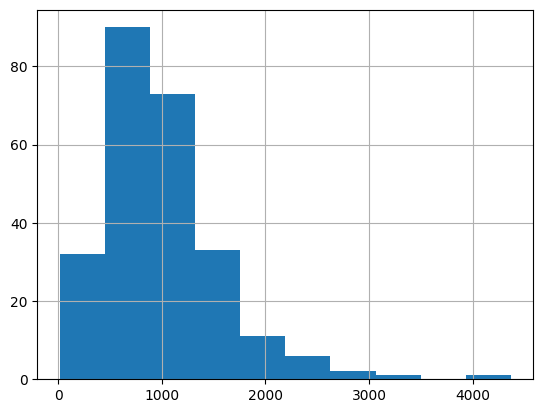

In [33]:
housingData_csv.drop([6], axis = 0, inplace=True)
housingData_csv["population"].hist()

# An alternative to dropping would be to just not select the problem data when copying it to a new variable like this
#housingData_csv=housingData_csv[housingData_csv["population"] != 100000]
#housingData_csv["population"].hist()

We also want to check for missing data. If you just want to remove the data then you could just use the *dropna* function which removes all rows with at least one missing value.

In [34]:
# You can check each column for the number of NA values if you are planning to replace them.
print('Nulls in Bedroom column:')
print(housingData_csv["totalBedrooms"].isnull().sum())

# However, for today we are going to keep things easy and just drop every row with missing data.
print('Original dataset length:')
print(len(housingData_csv))
housingData_csv_red = housingData_csv.dropna()
print('Dataset length after removing all rows  missing data:')
print(len(housingData_csv_red))

Nulls in Bedroom column:
1
Original dataset length:
249
Dataset length after removing all rows  missing data:
243


You can also removed duplicated rows:

In [35]:
print('Original dataset length:')
print(len(housingData_csv_red))
housingData_csv_red_dup = housingData_csv_red.drop_duplicates()
print('Dataset length after removing all rows with duplicates:')
print(len(housingData_csv_red_dup))


Original dataset length:
243
Dataset length after removing all rows with duplicates:
241


The final aspect of preparing your data I want to draw your attention to is the issue of data imbalances. For this we are going to load a new dataset for a categorisation problem used for identifying if someone has breast cancer.

In [36]:
cancer = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))
display(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


We want to find out how many benign (1.0) or malignant (0.0) cases there are:

In [37]:
categoryCounts = df['target'].value_counts()
print('Category label counts:')
print(categoryCounts)

Category label counts:
1.0    357
0.0    212
Name: target, dtype: int64


From this output we can see that there is nearly double the amount of benign samples. This may not seem like an issue, but when fitting a model, a class imbalance like this would mean that a model that just says that every sample is benign would still have around a 60% accuracy, and this problem only gets worse as the class imbalance grows. A basic solution to this is to sample the dataset so that the number instances for each category is the same, but that is not always practical and depending on your problem there may be better solutions.